## TRANSFORM

머신러닝 알고리즘 학습에 필요한 형태로 데이터를 조작, 학습에 적합한 형태로 변형<br>
<br>
TorchVision 데이터셋들은 변형 로직을 갖는, 호출 가능한 객체를 받는 두개의 매개변수 존재
- 특징(feature)을 변경하기 위한 transform
- 정답(label)을 변경하기 위한 target_transforn

<br>
torchvision.transforms 이용

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

학습을 하려면 정규화(normalize)된 텐서 형태의 특징(feature)과 원-핫(one-hot)으로 부호화(encode)된 텐서 형태의 정답(label)이 필요<br>
이러한 변형(transformation)을 하기 위해 ToTensor 와 Lambda 를 사용

In [2]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    # target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [3]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
ds[0][0][0][6]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6078, 0.9255, 0.8118, 0.6980,
        0.4196, 0.6118, 0.6314, 0.4275, 0.2510, 0.0902, 0.3020, 0.5098, 0.2824,
        0.0588])

In [5]:
import matplotlib.pyplot as plt

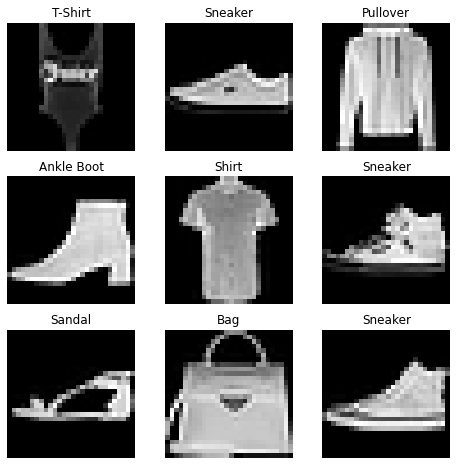

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(ds), size=(1,)).item()
    img, label = ds[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

<b>ToTensor</b> 는 PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로 비례하여 조정(scale)<br>
<br>
<b>Lambda변형</b>은 사용자 정의 람다(lambda) 함수를 적용<br>
여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의

In [7]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) # 정규화
)

In [8]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()